# LOAN-DEFAULT PREDICTION PROJECT

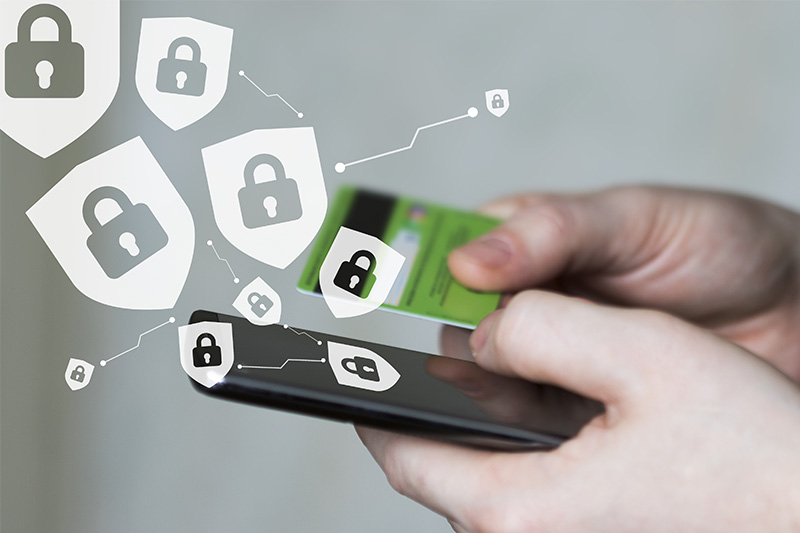

## Roadmap of this project:

**1. Data Loading**


*  Importing Required Libraries
*  Data Load



**2.Exploratory Data Analysis**



*  Check Information
*  Check the stats of the dataset



**3.Feature Engineering**



*  PCA
*  Scaling the dataset
*  SMOTETomek(handle imbalance)



**4.Feature Selection**


*  Co-Relation matrix
*  smotetomek
*  SelectKBest
*  RFE(Recursive Feature Elimination)
*  RFECV(Recursive Feature Elimination with cross-Validation)
*  Permutation Importance
*  SelectFromModel



**Model Building**

*  Random forest classifier
*  Decision tree classifier
*  Logistic Regression
*  Support Vector Machine(SVC)
*  AdaBoost Classifier
*  Gradient Boosting classifier

**Hyper-Parameter Tuning**

*  RandomizedSearchCV with Random forest and cv = StratifiedKFold
*  Results in the Accuracy of 88% with very low False Negitives.



# Importing Required Libraries

In [1]:
#install eli5 library
!pip install eli5

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.feature_selection import f_regression , SelectKBest , f_classif
pd.options.display.max_columns = 775
pd.options.display.max_rows = 775
from sklearn.metrics import r2_score , classification_report , confusion_matrix
import eli5
from sklearn.model_selection import train_test_split , cross_val_score
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from tqdm import tqdm
import warnings
from sklearn.ensemble import GradientBoostingClassifier
warnings.simplefilter("ignore")

In [3]:
#connect drive with colab
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Load

In [4]:
# DATA LOADING
train = pd.read_csv("/content/drive/MyDrive/train_v2.csv",index_col = "id")
#test =  pd.read_csv("/content/drive/MyDrive/test_v2.csv",index_col = "id")

# Exploratory Data Analysis

In [5]:
#check the shape of train
train.shape

(105471, 770)

In [6]:
#print the head of train
train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f464,f465,f466,f467,f468,f469,f470,f471,f472,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f534,f535,f536,f537,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f604,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f626,f627,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f695,f696,f697,f698,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [7]:
# CHECKING INFORMATION
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105471 entries, 1 to 105471
Columns: 770 entries, f1 to loss
dtypes: float64(653), int64(98), object(19)
memory usage: 620.4+ MB


In [8]:
# TRAIN DATA DESCRIPTION
train.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f464,f465,f466,f467,f468,f470,f471,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f535,f536,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f604,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f696,f697,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,105471.000000,105471.000000,105371.000000,105423.000000,1.054710e+05,105312.000000,105448.000000,105448.000000,105011.000000,103631.000000,103773.000000,1.047730e+05,105471.000000,105471.000000,1.047730e+05,105471.0000

# Dealing with Target Column


Note:

The loan Defaulter prediction can be more accurate whether the person would deposit the loan or not.

0 indicates the person is fair and other than this indicates they are defaulters so we can replace all values except 0 as 1 1 indicates the person is defaulter

In [9]:
# SPLITTING TARGET COLUMN INTO 0 AND 1 (make anything which is less than 1 as 0)
train.loss.loc[train.loss != 0] =1

In [10]:
#check the train 'loss' value_counts
train.loss.value_counts()

0    95688
1     9783
Name: loss, dtype: int64

In [11]:
#Checking for Duplicacy in Dataset
train.drop_duplicates().shape

(105471, 770)

In [12]:
#check the information of train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105471 entries, 1 to 105471
Columns: 770 entries, f1 to loss
dtypes: float64(653), int64(98), object(19)
memory usage: 620.4+ MB


As our file is very large we will convert the large size dataframe i.e more memory into low size dataframe.
i.e we will convert them into lower dtypes

In [13]:
#change the dtype into low memory form so that extra memory is saved and as a result training model will be more faster

for col in train.select_dtypes('number'):
    train[col] = pd.to_numeric(train[col], downcast='integer')
    if train[col].dtype == 'float':
        train[col] = pd.to_numeric(train[col], downcast='float')

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105471 entries, 1 to 105471
Columns: 770 entries, f1 to loss
dtypes: float32(535), float64(118), int16(31), int32(12), int64(11), int8(44), object(19)
memory usage: 350.6+ MB


In [14]:
train[train.select_dtypes(np.float64).columns] = train.select_dtypes(np.float64).astype(np.float32)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105471 entries, 1 to 105471
Columns: 770 entries, f1 to loss
dtypes: float32(653), int16(31), int32(12), int64(11), int8(44), object(19)
memory usage: 303.2+ MB


## Feature Engineering

## Interpretation of Categorical Columns

As the Dataset does not Contain data Dictionary it is impossible to interpret the Columns and there Values on aspect to target column , More over in practice adding categorical column one by one to model features for understanding the factor affecting the model accuracy

In our Case the Categorical columns would be scaled in the range of Numerical columns and treated according to it

# PCA

What is PCA?

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

PCA can be used when the dimensions of the input features are high.

Note: We are having high dimension. therefore it is always preferable to apply PCA to get the insight.

In [16]:
# SPLITTING DEPENDENT AND INDEPENTENT FEATURE

#create a list comprehension comprising of column names that are of int type
numerical_columns = [col for col in train.columns if train[col].dtype !="object"]

#select only the numerical_columns from train
train = train[numerical_columns]

#drop the rows in which loss is null (axis=0)
train.dropna(axis = 0 ,subset= ["loss"] ,   inplace=True)

#drop 'loss' from train (independent variable)
x = train.drop(columns = "loss")

#dependent varible 'loss'
y= train.loss


In [17]:
# SCALING DATA BEFORE APPLYING

#create a object os Standard scaler
scaling=StandardScaler()

#iterate over the columns and fill null values with mean and scale the dataframe
for col in x.columns:
    #train columns
    x[col].fillna(x[col].mean() , inplace = True)
    x[col] = scaling.fit_transform(x[[col]])

#make a dataframe passing x
Scaled_data = pd.DataFrame(x)

In [18]:
# PCA WITH RESEMBLING 95% OF EXACT OF THE DATASET

#create an object of PCA with n_components=0.95
principal=PCA(n_components = 0.95)

#fit it on Scaled_data
principal.fit(Scaled_data)

#transform the Scaled_data
x_scaled = principal.transform(Scaled_data)

In [19]:
# INFERENCING THE SCALED AND PCA COMPONENTS
x_scaled.shape

(105471, 135)

Principal component analysis (PCA) is an unsupervised machine learning technique. Perhaps the most popular use of principal component analysis is dimensionality reduction. Besides using PCA as a data preparation technique, we can also use it to help visualize data. A picture is worth a thousand words. With the data visualized, it is easier for us to get some insights and decide on the next step in our machine learning models.



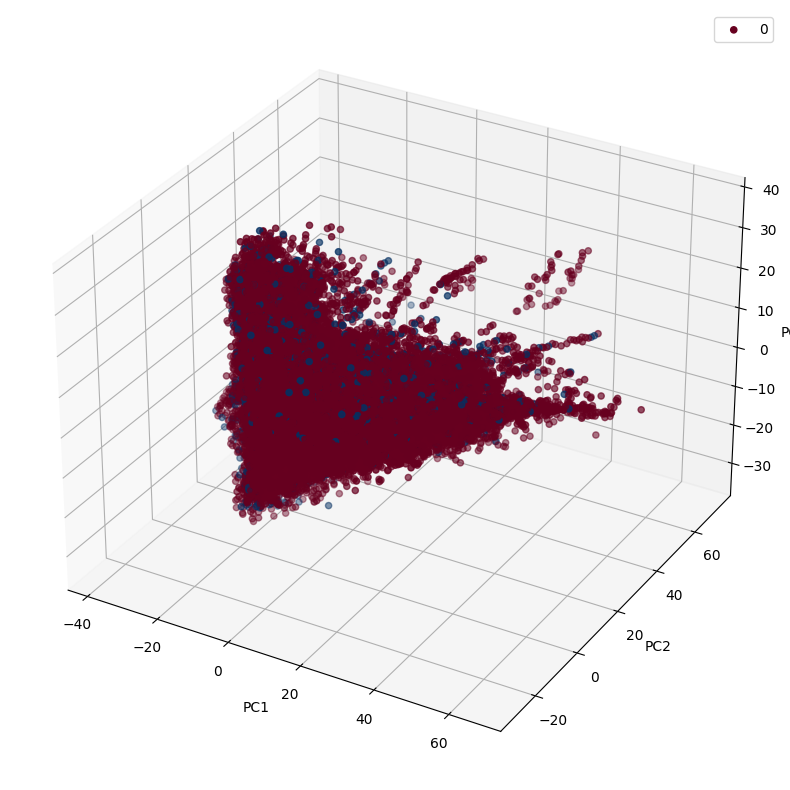

In [20]:
# TARGET COLUMN VARIES FROM 0 TO 100, THERE ARE 100 CLASSES IN IT WHICH ARE OVERLAPPING
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,0],x_scaled[:,1],x_scaled[:,2], c= y ,cmap='RdBu')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.legend([0 , 1])

**Note:** Nothing conclusive we can find by taking the first three columns in PCA. As we are clearly seeing the data is spreaded all over in a random fashion

Text(0.5, 0, 'PC3')

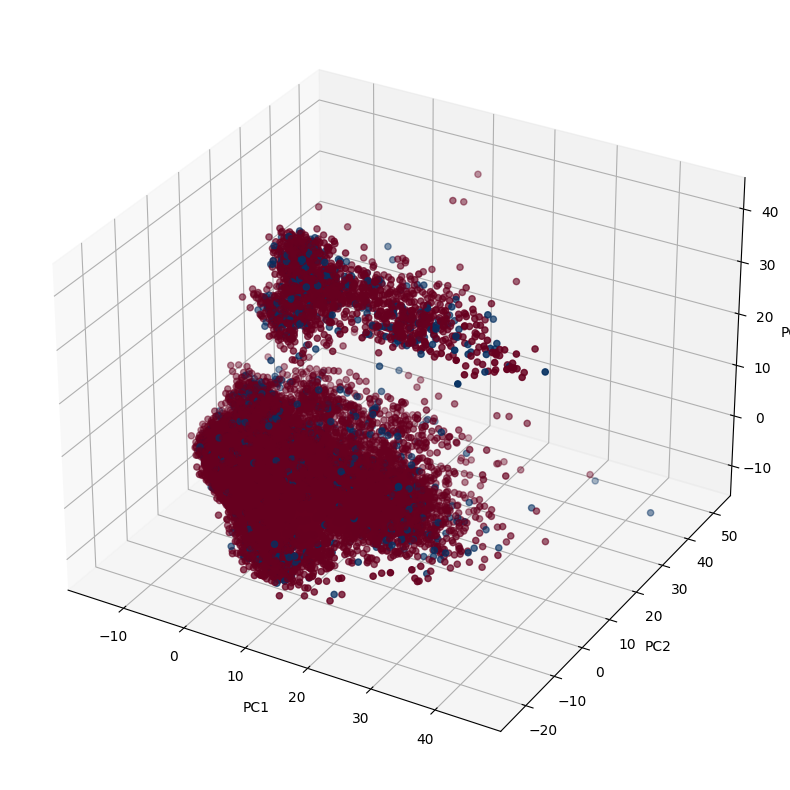

In [21]:
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,3],x_scaled[:,4],x_scaled[:,5], c= y ,cmap='RdBu')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


Text(0.5, 0, 'PC3')

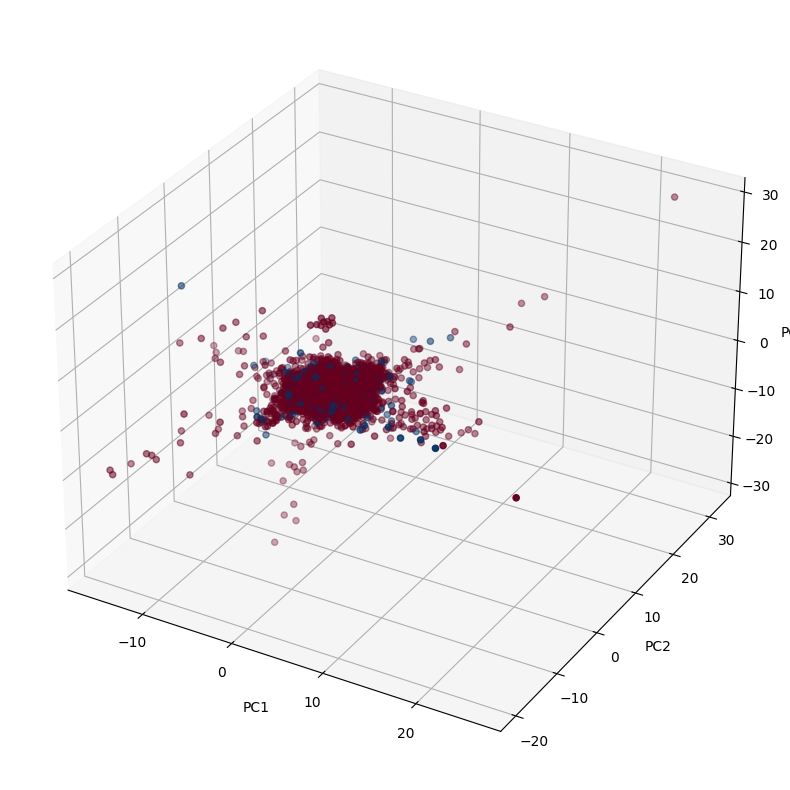

In [22]:
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,100],x_scaled[:,102],x_scaled[:,105], c= y ,cmap='RdBu')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


**Note:** It is clearly visible that nothing conclusive we can find with PCA

In [23]:
# DATAFRAME AFTER PCA
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134
0,-16.662354,7.483083,-4.630055,-3.329767,-2.978395,-3.189481,4.972938,-2.279586,-4.153026,-0.815999,-1.814862,5.075084,1.363655,-0.650317,-0.029847,0.145287,5.281030,-3.543648,1.020464,-7.456899,-2.265003,-2.281931,2.580324,1.955695,-1.056515,-0.800058,-0.018017,-1.012166,-0.129993,0.552740,1.689874,0.075028,0.898961,0.996707,-2.133898,1.326311,1.810322,0.561394,2.746613,-0.400128,-2.187718,-0.783578,1.320892,0.342370,1.412907,-0.104141,0.542378,-0.110284,0.185567,-0.936535,-0.059070,1.277121,1.620053,0.670021,-0.911424,0.529516,-0.032082,1.274276,0.884495,0.307004,-0.784345,-0.553498,1.805187,0.427734,-0.380289,-0.376464,0.657966,-0.118176,0.699796,0.526877,-0.487257,-0.320906,0.720429,-1.419583,-0.036134,-0.510672,0.389199,-0.375506,-0.474557,0.131603,-1.146242,0.254112,-0.447056,0.358410,0.241006,-0.169942,0.352048,-1.662983,0.251453,0.847406,0.228868,0.016630,-0.494116,-0.315337,0.551357,0.574295,0.042903,-1.028925,-0.541176,-0.397126,0.208438,0.568813,0.334314,-0.139570,0.579412,-0.739788,-0.022989,-0.148382,0.622517,-0.664105,-0.099573,0.374530,-0.182298,-0.312117,0.238469,-1.149424,0.645151,0.108485,1.098757,-0.440949,0.236717,0.189839,0.824262,0.053662,1.781114,1.209436,-0.740416,0.415333,-0.089432,0.841656,-0.050993,-0.394179,-0.282069,2.016483,-0.285482
1,2.184919,-13.574715,1.896089,-0.908516,-5.643978,2.884871,-2.210406,5.485957,0.262457,2.745366,0.452479,1.504813,1.447752,0.317201,0.363026,-1.501797,0.598312,3.885818,2.658755,-1.759325,-0.355152,-0.773340,1.154517,0.995816,-1.590376,-0.512205,-0.190814,0.449006,2.217112,0.348084,0.895689,-0.835758,1.142067,-0.324534,-1.676646,-0.680298,-1.692263,0.734374,2.896464,-0.156773,0.199927,0.888313,0.491958,-0.664472,-0.180153,0.325662,0.253948,-0.278882,0.120461,0.543622,-0.147086,-0.086821,0.919112,0.507474,-0.330994,-0.301049,0.134811,0.249509,-0.187927,-0.973824,0.780554,-0.320280,0.094132,0.738151,0.623226,-0.332220,-1.195358,-0.568774,-0.351197,-0.798172,0.854993,-1.333514,0.616891,-0.315253,-0.164576,-0.528007,-0.076216,-0.902119,-0.599373,-0.228149,0.247056,0.061200,0.205000,-0.708446,0.212680,0.281370,-0.151767,0.342428,0.369308,1.105935,-1.069596,0.394423,-0.520103,0.288931,-0.370346,0.247161,-0.700740,-0.411898,-1.733070,0.966795,0.670910,0.537929,-0.692909,-0.494303,0.351756,0.137755,0.479061,0.567498,0.440878,0.626104,-0.454832,0.370464,0.336734,-0.436739,0.068662,-0.038810,-0.112727,-0.088774,0.210564,0.084598,-0.786556,0.692778,-0.599656,0.357567,0.544963,0.203680,0.019713,-1.742018,-0.502490,0.626686,0.042427,-0.098675,0.736945,-1.538345,-0.564808
2,2.015382,-6.054514,0.751574,-4.025777,-1.073280,1.747095,-0.104960,-1.188164,-0.088602,-0.571792,0.760844,0.705941,0.158918,-1.063740,-0.778353,-0.794795,1.930849,5.196134,-1.241242,-0.633339,0.246921,1.359825,0.998428,1.112311,0.900606,-0.285212,-0.592645,0.241839,2.704099,-0.717091,0.613250,0.123128,2.187155,-1.368255,0.087335,0.809818,-0.716070,0.703338,-0.507908,-1.094133,1.804065,0.151684,-1.779791,-0.169238,0.909395,-0.303450,-0.815591,-0.460110,1.604075,0.706049,0.117739,-1.646136,0.171601,-0.255036,-1.824886,-0.539261,1.078157,-0.161197,2.225912,1.105220,0.187997,0.480746,-0.883288,-0.761578,-0.268309,-0.269331,0.660828,1.360576,-1.929432,-0.091711,-0.520662,-0.022193,-0.741629,-1.792641,-1.592475,-0.205785,0.121887,0.884959,-1.415322,-0.178864,0.518946,-0.123155,1.556533,0.243710,-0.262769,0.795468,-2.061216,-0.750678,0.250787,-0.394499,0.627811,-0.848752,-0.469625,0.265087,-0.059093,0.272162,1.050385,-1.050498,-1.200658,0.949493,1.054545,-0.088981,-1.157511,-0.261701,0.608639,-

In [24]:
# SUPERVISING THE NUMERICAL COLUMNS REQUIRED FROM DATASET
# DROPPING COLUMNS HAVING NULL VALUES

#create a list comprehension comprising of column names that are of int type
numerical_columns =[col for col in train.columns if train[col].dtype !="object"]

#select only the numerical_columns from train
train = train[numerical_columns]

#drop the rows in which loss is null (axis=0)
train.dropna(axis =0,subset =["loss"],inplace = True)

#drop 'loss' from train (independent variable)
f1 = train.drop(columns = "loss")
#dependent variable
t1 = train.loss

In [25]:
# IMPUTING NULL VALUES WITH MEAN VALUE AND SCALING THE DATA WITH STANDARD SCALER
scaler = StandardScaler()

#iterate over the columns and fill null values with mean and scale the dataframe
for col in f1.columns:
    #train columns
    f1[col].fillna(f1[col].mean() , inplace = True)
    f1[col] = scaler.fit_transform(f1[[col]])

<Axes: xlabel='loss', ylabel='count'>

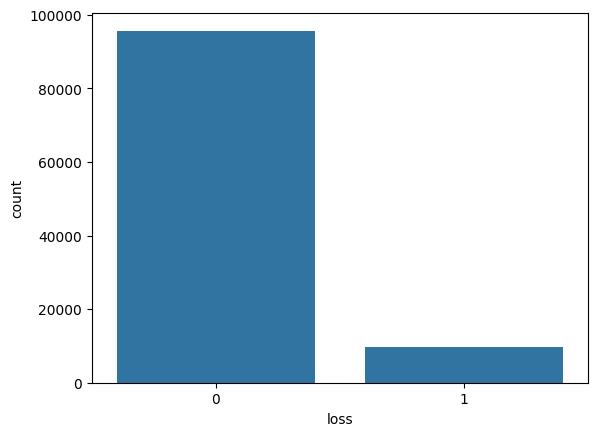

In [26]:
# VISUALIZATION OVER THE TARGET COLUMN
sns.countplot(x="loss",data=train)

In [27]:
f1.shape,t1.shape

((105471, 750), (105471,))

**Note:** It is highly imbalanced dataset,having 1 around 20000 and 83000.
     
          If we will do balancing, possibly we loose a lot of 0 class data.

# Feature Selection

# What is correlation?

Correlation is a statistical measure that expresses the extent to which two  variables are linearly related.

Correlation explains how one or more variables are related to each other

In [28]:
# FINDING THE CORRELATION OF EACH COLUMN WITH TARGET COLUMN WITH CORRELATION MATRIX`

#create a empty list corr_data
corr_data = []

#apply the .corr() fucntion on the columns using loop
for col in f1:
    #check the co-relation of 'loss' with other columns
    corr = train["loss"].corr(train[col])
    if not np.isnan(corr):
        corr_data.append([col, abs(corr)])

#create a dataframe storing the correlation values
corr_data = pd.DataFrame(corr_data, columns = ['column_name','% corr']).sort_values(by = '% corr', ascending = False)

#print the first 10 rows of corr_data
corr_data[:10]

,column_name,% corr
726,f766,0.134531
387,f404,0.134485
308,f322,0.123838
388,f405,0.120804
727,f767,0.120789
267,f281,0.118078
644,f676,0.115552
725,f765,0.115552
597,f629,0.112960
728,f768,0.111261


## Distribution plot for Top 5 columns

<Axes: xlabel='f766', ylabel='Count'>

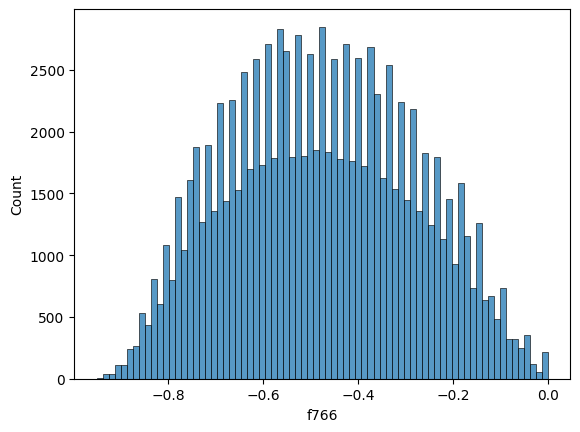

In [29]:
#plot the hist plot of 'f766'
sns.histplot(train.f766)

<Axes: xlabel='f404', ylabel='Count'>

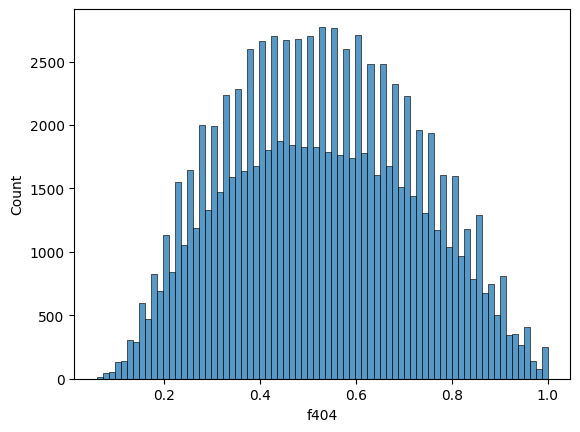

In [30]:
#plot the hist plot of 'f404'
sns.histplot(train.f404)

<Axes: xlabel='f322', ylabel='Count'>

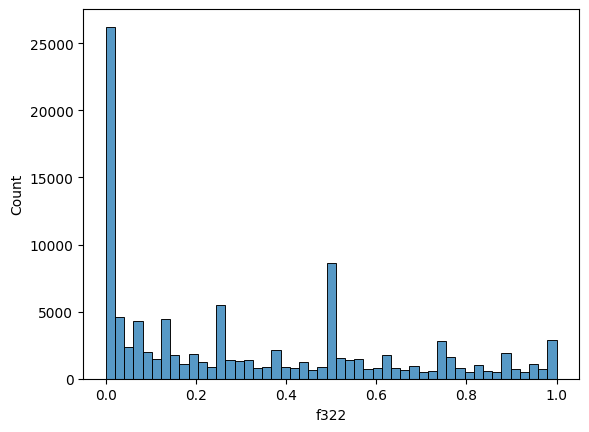

In [31]:
#plot the hist plot of 'f322'
sns.histplot(train.f322)

<Axes: xlabel='f405', ylabel='Count'>

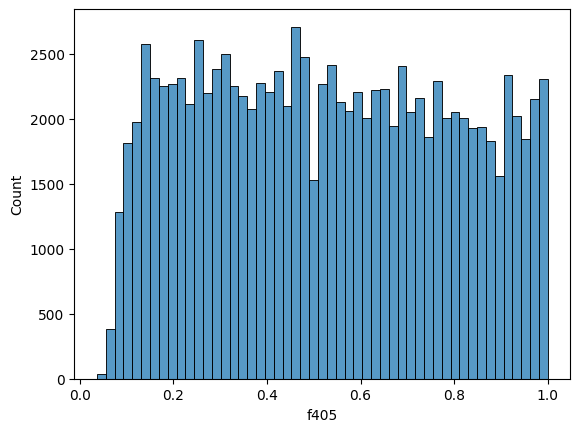

In [32]:
#plot the hist plot of 'f405'
sns.histplot(train.f405)

<Axes: xlabel='f767', ylabel='Count'>

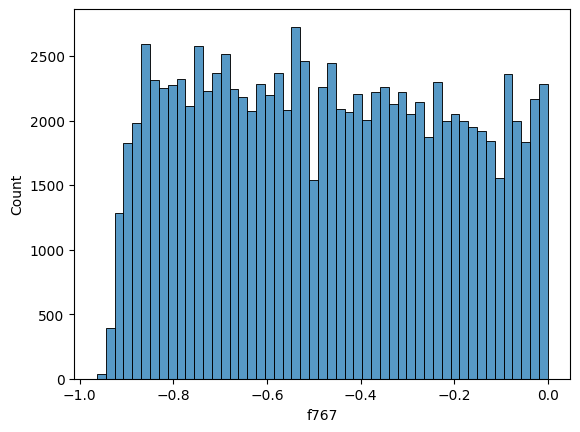

In [33]:
#plot the hist plot of 'f767'
sns.histplot(train.f767)

The data is normally distributed

In [34]:
#create a train-test split of the top 10 columns  we got as the output of PCA
f2 = train[corr_data[:10]["column_name"]]
#store loss in t2
t2 = train.loss
for col in f2.columns:
    #fill all the nan values with mean
    f2[col].fillna(f2[col].mean() , inplace = True)
#train-test split of f2,t2
X_train1, X_test1, y_train1, y_test1 = train_test_split(f2 , t2 , test_size =0.2,random_state = 30)

#### SMOTETOMEK is somewhere upsampling and downsampling. SMOTETomek is a hybrid method which is a mixture of the above two methods, it uses an under-sampling method (Tomek) with an oversampling method (SMOTE).

In [35]:
#use the smotetomek technique on X_tain1,y_train1 to handle the imbalance

from collections import Counter

from imblearn.combine import SMOTETomek


X =X_train1
y = y_train1
print('Original dataset shape %s' % Counter(y))

#create a smotetomek object
sm =SMOTETomek(random_state=42)

#use the fit_resample function in X,y

X_train_balanced, y_train_balanced =sm.fit_resample(X,y) # this fit_resample method works only on 10 to 15 columns not works on 100's of columns

#print the X_train_balanced, y_train_balanced
print("Resampled dataset shape %s" % Counter(y_train_balanced))


Original dataset shape Counter({0: 76582, 1: 7794})
Resampled dataset shape Counter({1: 75753, 0: 75753})


In [76]:
X_train1.shape,y_train1.shape

((84376, 10), (84376,))

In [36]:
#check the shape of X_train_balanced
X_train_balanced.shape

(151506, 10)

In [37]:
#we will create this model just to get a basic idea of the training
#create a random forest model and fit X_train_balanced,y_train_balanced

#create  a object with n_estimatios=300,criteria='entropy'
model =RandomForestClassifier(n_estimators = 300,criterion = "entropy")

#fit it on X_train_balanced, y_train_balanced
model.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [38]:
#print the classification report
print(classification_report(y_test1,model.predict(X_test1)))

#print the confusion matrix
ax=confusion_matrix(y_test1,model.predict(X_test1))
print(ax)


              precision    recall  f1-score   support

           0       0.91      0.99      0.94     19106
           1       0.13      0.02      0.03      1989

    accuracy                           0.90     21095
   macro avg       0.52      0.50      0.49     21095
weighted avg       0.83      0.90      0.86     21095

[[18849   257]
 [ 1950    39]]


By running this model we got the basic idea of fitting the data on the model...justto get familier with training later we will using different models

In [39]:
#training Logistic Regression model on dataset columns based on correlation data
#Results are pretty clear model is unable to Understand the 1st class with columns

#create a logistic reg model and fit on X_train_balanced,y_train_balanced
model_lr =LogisticRegression(n_jobs = -1).fit(X_train_balanced,y_train_balanced)
#predict the X_test1
y_predicts =model_lr.predict(X_test1)

#print the classification report
print(classification_report(y_test1,y_predicts))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71     19106
           1       0.14      0.66      0.23      1989

    accuracy                           0.57     21095
   macro avg       0.54      0.61      0.47     21095
weighted avg       0.86      0.57      0.66     21095



In [48]:
# example of grid searching key hyperparametres for logistic regression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = X_train_balanced , y_train_balanced


# define logisticregression model and parameters
model =LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


# create a dictionary with the above hyper-parameters
grid = dict(solver=solvers,penalty=penalty,C=c_values)

#create a object of  RepeatedStratifiedKFold with n_splits=10, n_repeats=3
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats =3,random_state =1)

#create a gridsearchcv object with these hyperparameters and scoring='accuracy',error_score=0
grid_search =GridSearchCV(estimator = model,param_grid = grid,n_jobs =-1, cv=cv, scoring="accuracy",error_score=0)

#fit the model on X,y
grid_result =grid_search.fit(X,y)
grid_result.predict(X_test1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.604814 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604814 (0.003517) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604641 (0.003543) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604693 (0.003497) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.604777 (0.003463) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604649 (0.003509) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604643 (0.003596) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.604709 (0.003398) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604645 (0.003535) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604726 (0.003487) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.604506 (0.003368) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604531 (0.003374) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604548 (0.003374) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.604176 (0.003430) wit

In [49]:
#print the classification report and confusion matrix
print(classification_report(y_test1,grid_result.predict(X_test1)))
print(confusion_matrix(y_test1,grid_result.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.94      0.56      0.71     19106
           1       0.14      0.65      0.22      1989

    accuracy                           0.57     21095
   macro avg       0.54      0.61      0.47     21095
weighted avg       0.86      0.57      0.66     21095

[[10792  8314]
 [  687  1302]]


In [50]:
#import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [51]:
X_train1.shape,y_train1.shape

((84376, 10), (84376,))

## Feature Selection Using SelectKBest

The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training.

In [80]:
# feature selection function using selectKbest
def select_features(X_train_, y_train_, X_test_,criteria):
    # configure to select a subset of features
    fs = SelectKBest(score_func=criteria, k=10)
    # learn relationship from training data
    fs.fit(X_train_, y_train_)
    # transform train input data
    X_train_fs = fs.transform(X_train_)
    # transform test input data
    X_test_fs = fs.transform(X_test_)

    return X_train_fs, X_test_fs, fs

In [73]:
train.shape

(105471, 751)

In [77]:
X_train1.shape,y_train1.shape

((84376, 10), (84376,))

In [81]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train1.head(10000), y_train1.head(10000), X_test1.head(10000),mutual_info_classif)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train1.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test1.head(10000), yhat)
print('Accuracy: %.2f' % (accuracy*100))                       # SelectKBest is a feature selection technique by selecting the best features to give a good accuracy

Accuracy: 90.33


In [82]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train1.head(10000), y_train1.head(10000), X_test1.head(10000),f_classif)
# fit the model SVC with kernel='poly'
model = SVC(kernel = "poly")
model.fit(X_train_fs, y_train1.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test1.head(10000),yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.33


In [83]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train1.head(10000), y_train1.head(10000), X_test1.head(10000),f_classif)
# fit the model svc with kernel='linear'
model = SVC(kernel = "linear")
model.fit(X_train_fs, y_train1.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test1.head(10000),yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.33


In [84]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train1.head(10000), y_train1.head(10000), X_test1.head(10000),f_classif)
# fit the model logistic R with solver='newton-cg'
model = LogisticRegression(solver = "newton-cg")
model.fit(X_train_fs, y_train1.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test1.head(10000),yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.33


In [85]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train1.head(10000), y_train1.head(10000), X_test1.head(10000),f_classif)
# fit the model logistic regression with penalty='l1',solver='liblinear'
model = LogisticRegression(penalty = "l1" ,solver = "liblinear")
model.fit(X_train_fs, y_train1.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test1.head(10000),yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.33


In [86]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train1.head(10000),y_train1.head(10000),X_test1.head(10000),mutual_info_classif)
# fit the model svc with kernel='sigmoid'
model = SVC(kernel = "sigmoid")
model.fit(X_train_fs, y_train1.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy =accuracy_score(y_test1.head(10000),yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.33


In [87]:
from sklearn.tree import DecisionTreeClassifier
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train1.head(10000),y_train1.head(10000),X_test1.head(10000),mutual_info_classif)
# fit the model DTC
model = DecisionTreeClassifier()
model.fit(X_train_fs, y_train1.head(10000))
# evaluate the model
yhat =model.predict(X_test_fs)
# evaluate predictions
accuracy =accuracy_score(y_test1.head(10000),yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 82.18


In [88]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train1.head(10000),y_train1.head(10000),X_test1.head(10000),mutual_info_classif)
# fit the model RFC
model = RandomForestClassifier()
model.fit(X_train_fs, y_train1.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test1.head(10000),yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.27


In [89]:
#plot the confusion matrix for model(RandomFClassifier)

print(confusion_matrix(y_test1.head(10000),yhat))

# 9020 is TN
# 13 is FP
# 965 is FN
# 2 is TP

[[9024    9]
 [ 964    3]]


## RFECV

**Recursive Feature Elimination**, Cross-Validated (RFECV) feature selection. Selects the best subset of features for the supplied estimator by removing 0 to N features (where N is the number of features) using recursive feature elimination, then selecting the best subset based on the cross-validation score of the model.

In [90]:
from sklearn.pipeline import Pipeline

# create pipeline RFECV with RandomForestClassifier(),parameters : min_features_to_select=5,cv=5
rfe = RFECV(estimator = RandomForestClassifier(),min_features_to_select = 5,cv= 5)

model = LogisticRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on sample available data 5000 rows
pipeline.fit(X_train1.head(5000), y_train1.head(5000))
# make a prediction
yhat =pipeline.predict(X_test1.head(5000))
accuracy =(accuracy_score(y_test1.head(5000),yhat))
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.40


## RFE

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [91]:
# create pipeline
#create a RFE object with estimator as logistic regression and n_features_to_select=20
rfe = RFE(estimator = LogisticRegression(),n_features_to_select =20)

#create a object of Logistic Regression
model = LogisticRegression(n_jobs =-1)

#define a pipeline with steps=[('s',rfe),('m',model)]
pipeline = Pipeline(steps =[("s",rfe),("m",model)])

# fit the model on sample available data
pipeline.fit(X_train1.head(1000), y_train1.head(1000))

# make a prediction for one example
yhat = pipeline.predict(X_test1.head(1000))

#get the accuracy_score using (y_test.head(1000), yhat)
accuracy = accuracy_score(y_test1.head(1000),yhat)

#print the accuracy
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.30


In [92]:
# create pipeline

#create a RFE object with estimator as logistic regression and n_features_to_select=20
rfe = RFE(estimator = LogisticRegression(),n_features_to_select =20)

#create an object of RandomF classifer
model = RandomForestClassifier()

#define a pipeline with steps=[('s',rfe),('m',model)]
pipeline = Pipeline(steps =[("s",rfe),("m",model)])

# fit the model on sample available data
pipeline.fit(X_train1.head(1000), y_train1.head(1000))

# make a prediction for one example
yhat = pipeline.predict(X_test1.head(1000))

#get the accuracy_score using (y_test.head(1000), yhat)
accuracy = accuracy_score(y_test1.head(1000),yhat)

#print the accuracy
print('Accuracy: %.2f' % (accuracy*100))

# in this logistic regression is for feature selection and RFC for model selection

Accuracy: 90.70


In [93]:
#create a RFE object with estimator as logistic regression and n_features_to_select=20
rfe = RFE(estimator = LogisticRegression(),n_features_to_select =20)

#create an object of  AdaBoostClassifier
model = AdaBoostClassifier()

#define a pipeline with steps=[('s',rfe),('m',model)]
pipeline = Pipeline(steps =[("s",rfe),("m",model)])

# fit the model on sample available data
pipeline.fit(X_train1.head(1000), y_train1.head(1000))

# make a prediction for one example
yhat = pipeline.predict(X_test1.head(1000))

#get the accuracy_score using (y_test.head(1000), yhat)
accuracy = accuracy_score(y_test1.head(1000),yhat)

#print the accuracy
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.80


In [94]:
# So, far we have seen many techniques by selecting the numerical features and by using all the model we got to know that
# the accuracy by comparing all the models it varies from 80 to 90 percentage of accuracy.

# Feature Selection using Permutation Importance

What is Feature Permutation Importance?

Feature permutation importance measures the predictive value of a feature for any black box estimator, classifier, or regressor.

It does this by evaluating how the prediction error increases when a feature is not available

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. It is implemented in scikit-learn as permutation_importance method. As arguments it requires trained model (can be any model compatible with scikit-learn API) and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

In [96]:
# TRAINING A BASE MODEL TO UNDERSTAND FEATURES AND EXTRACTING FEATURE IMPORTANCE

#create a logistic R model
model  =   LogisticRegression().fit(X_train1 , y_train1 )

#create a permutationImportance object and fit (X_test.head(2000), y_test.head(2000))
permute = PermutationImportance(model ,random_state =20).fit(X_test1.head(2000),y_test1.head(2000))

#print the weights
eli5.show_weights( permute , feature_names = X_test1.columns.tolist() )

Weight,Feature
0 ± 0.0000,f768
0 ± 0.0000,f629
0 ± 0.0000,f765
0 ± 0.0000,f676
0 ± 0.0000,f281
0 ± 0.0000,f767
0 ± 0.0000,f405
0 ± 0.0000,f322
0 ± 0.0000,f404
0 ± 0.0000,f766


In [97]:
permute

PermutationImportance(estimator=LogisticRegression(), random_state=20)

In [98]:
#create a list of top 7 important features
features =["f768","f629","f765","676","f281","f767","f405"]

## Model Training

In [99]:
#print the shape of X_train,y_train
train.shape,y_train1.shape

((105471, 751), (84376,))

In [100]:
#print the shape of X_test,y_test
X_test1.shape,y_test1.shape

((21095, 10), (21095,))

# SelectFromModel
# How does select from model work?

#### Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data. It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.

In [103]:
# ChOOSING IMPORTANT FEATURES using selectfrommodel
# threshold 0.001 by default
selector = SelectFromModel(permute, threshold=0.0015, prefit=True)

#tranform the X-train using selector
X_train_req = selector.transform(X_train1)

#tranform the X-test using selector
X_test_req =selector.transform(X_test1)

In [104]:
# REQUIRED FEATURES FOR TRAINING THE MODEL AND COMPARING THE ACTUAL DATA
X_train_req.shape , train.shape

((84376, 0), (105471, 751))

In [105]:
#print shape of y_train
y_train1.shape

(84376,)

In [107]:
#value_counts of y_train
y_train1.value_counts()

0    76582
1     7794
Name: loss, dtype: int64

In [112]:
#use the smotetomek technique on X_tain1,y_train1 to handle the imbalance on X_train_req and y_train


#print the value counts of y_train using counter
print("Original dataset shape Counter %s"% Counter(y_train1))

#define a SMOTETomek function
sm = SMOTETomek(random_state=0)

#fit_resample on (X_train_req, y_train
X_train_balanced, y_train_balanced = sm.fit_resample(X_train1,y_train1)

#print the value counts of y_train_balanced using counter
print("Resampled dataset shape Counter %s"% Counter(y_train_balanced))


Original dataset shape Counter Counter({0: 76582, 1: 7794})
Resampled dataset shape Counter Counter({1: 75721, 0: 75721})


In [113]:
#print the value_counts of y_train_balanced
y_train_balanced.value_counts()

1    75721
0    75721
Name: loss, dtype: int64

In [114]:
#print the shape of X_train_balanced
X_train_balanced.shape

(151442, 10)

## RANDOMFORESTCLASSSIFIER

In [116]:
# TRAINING MODEL ON RFC

#create a object of RFC with n_jobs=-1 and fit the ( X_train_balanced , y_train_balanced)
rfe= RandomForestClassifier(n_jobs =-1).fit(X_train_balanced,y_train_balanced)

#predict the X_test_req
y_predicts = rfe.predict(X_test1)

#print the Classificatio Report
print(classification_report(y_test1,y_predicts))

#print the confusion matrix
print(confusion_matrix(y_test1,y_predicts))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     19106
           1       0.15      0.03      0.04      1989

    accuracy                           0.89     21095
   macro avg       0.53      0.51      0.49     21095
weighted avg       0.83      0.89      0.86     21095

[[18808   298]
 [ 1938    51]]


## Decision tREE cLASSIFIER

In [117]:
# TRAINING MODEL ON DTC
from sklearn.tree import DecisionTreeClassifier
#create a model DecisionTreeClassifier() and fit  X_train_balanced , y_train_balanced
dtc = DecisionTreeClassifier().fit(X_train_balanced,y_train_balanced)

#predict the X_test_req
y_predicts = dtc.predict(X_test1)

#classification REeport
print(classification_report(y_test1,y_predicts))

#confusion Matrix
print(confusion_matrix(y_test1,y_predicts))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     19106
           1       0.11      0.14      0.12      1989

    accuracy                           0.81     21095
   macro avg       0.51      0.51      0.51     21095
weighted avg       0.83      0.81      0.82     21095

[[16795  2311]
 [ 1715   274]]


## Logistic Regression

In [121]:
# TRAINING MODEL ON LOGISTIC REGRESSION

model_lr =LogisticRegression(n_jobs =-1).fit(X_train_balanced,y_train_balanced)
y_predicts =model_lr.predict(X_test1)

#classification REeport
print(classification_report(y_test1,y_predicts))

#confusion Matrix
print(confusion_matrix(y_test1,y_predicts))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71     19106
           1       0.14      0.65      0.22      1989

    accuracy                           0.58     21095
   macro avg       0.54      0.61      0.47     21095
weighted avg       0.86      0.58      0.66     21095

[[10853  8253]
 [  693  1296]]


# Support Vector Machine

In [122]:
# TRAINING MODEL ON SVM
model_svm = SVC().fit(X_train_balanced,y_train_balanced)
y_predicts = model_svm.predict(X_test1)

#classification REeport
print(classification_report(y_test1,y_predicts))

#confusion Matrix
print(confusion_matrix(y_test1,y_predicts))


              precision    recall  f1-score   support

           0       0.94      0.53      0.68     19106
           1       0.13      0.68      0.22      1989

    accuracy                           0.55     21095
   macro avg       0.54      0.61      0.45     21095
weighted avg       0.86      0.55      0.64     21095

[[10213  8893]
 [  641  1348]]


## Adaboost

In [123]:
# TRAINING MODEL ON ADABOOST
model_ada = AdaBoostClassifier().fit(X_train_balanced,y_train_balanced)
y_predicts =model_ada.predict(X_test1)

#classification REeport
print(classification_report(y_test1,y_predicts))

#confusion Matrix
print(confusion_matrix(y_test1,y_predicts))

              precision    recall  f1-score   support

           0       0.94      0.47      0.63     19106
           1       0.12      0.71      0.21      1989

    accuracy                           0.50     21095
   macro avg       0.53      0.59      0.42     21095
weighted avg       0.86      0.50      0.59     21095

[[ 9055 10051]
 [  572  1417]]


# Gradient Boosting

In [124]:
# TRAINING MODEL ON GB
model_gbc = GradientBoostingClassifier().fit(X_train_balanced,y_train_balanced)
y_predicts = model_gbc.predict(X_test1)

#classification REeport
print(classification_report(y_test1,y_predicts))

#confusion Matrix
print(confusion_matrix(y_test1,y_predicts))


              precision    recall  f1-score   support

           0       0.93      0.66      0.77     19106
           1       0.13      0.49      0.21      1989

    accuracy                           0.65     21095
   macro avg       0.53      0.57      0.49     21095
weighted avg       0.85      0.65      0.72     21095

[[12697  6409]
 [ 1024   965]]


## we will hyper paramter tune the RandomForestClassifier as it performed the best

# Hyper-Parameter Tuning

In [125]:
#import libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
#HYper parameter tuning

#rf_params = {'n_estimators':[100,200,300],
#             'max_features':[5,7,'auto',8],
#             'min_samples_split':[2,8,15,20],
#             'max_depth':[5,8,15,None,10],
#             "criterion": ["gini", "entropy"]}


In [126]:
#HYper parameter tuning

rf_params = {'n_estimators':[200,300],

             "criterion": ["gini", "entropy"]}


In [127]:
#create an object of RandomizedSearchCV with RandomForest as base estimator with cross validation as StratifiedKfold

#create an object of StratifiedKFold with n_splits=5
cross_val = StratifiedKFold(n_splits =5)

#craete an object of RandomF classifier
clf = RandomForestClassifier()

#create a RandomizedSearchCV with clf,rf_params,n_iter=20,cross_val,n_jobs=-1
random_search = RandomizedSearchCV(clf,param_distributions = rf_params,
                                   n_iter =20,cv = cross_val,
                                   n_jobs =-1)

#fit the random_search on  X_train_balanced , y_train_balanced
random_search.fit( X_train_balanced , y_train_balanced)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': [200, 300]})

In [128]:
#print teh best_estimator_ for random_search
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [129]:
#Train the model with the best parameters

#create a RFC with the best_estimator
model_rf = RandomForestClassifier(n_jobs = -1,n_estimators =300,criterion = "entropy").fit(X_train_balanced,y_train_balanced)

#predict the X_test_req
y_predicts = model_rf.predict(X_test1)

#classification report
print(classification_report(y_test1,y_predicts))

#confusionm  matrix
print(confusion_matrix(y_test1,y_predicts))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     19106
           1       0.15      0.02      0.04      1989

    accuracy                           0.90     21095
   macro avg       0.53      0.50      0.49     21095
weighted avg       0.83      0.90      0.86     21095

[[18859   247]
 [ 1946    43]]


### After doing a lot of training and Handling the imbalance we have arrived to the final model.

### The final model has FN around 61 which is very less.

### You will be surprised that we have got so good results on this project that such low FN is nowhere, such a low value for all the solutions available on the Internet.


# Great JOB!!!

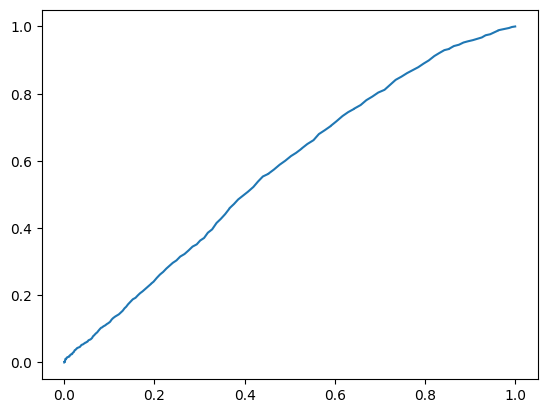

In [130]:
#import the ROC curve and print plot the ROC-Curve
from sklearn.metrics import roc_curve

#calculate fpr,tpr
fpr,tpr,thresholds = roc_curve(y_test1,model_rf.predict_proba(X_test1)[::,1])

#calculate area under the curve to disply
plt.plot(fpr,tpr)


plt.show()

Note:   we have tried almost all the ways of numerical feature selection technique's but all of that was not possible to show here...so we have tried to show you all the important feature selection tecniques in this project and further for handling the imbalance we have used all the techniques like undersampling,oversampling,smotetomek.but our finally result was best when we used SMOTETomek.

**Note** There are this much of estimator presents upon which you can apply hyperparameter tunning.


# Conclusion:


1.   We applied hyperparameter tuning on Random Forest considering the best performing model
2.  This is how we come to the best perfoming model over pridicting loan defaulter.
3. Now, we are capable of dealing with the case of loan default and ready to reduce the chance of default and help finance sector or loan delear to optimise the risk and enhance the profit

# Points to Remember


*   As the we are working on hypothetical banking dataset. In real life the data is given by Finance sector itself only and it is higly confidential. There you enjoy the real taste of working with financial data.
*   While working with large dataset and performing hyperparameter tuning, it's sometimes like minutes, sometimes hour and hours as well. So don't panic it depends upon the values, parameter and type of algorithm you have choosen for hyperparameter tuning.

